In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

In [59]:
community_tabs = pd.read_csv('/Users/carloszetina/Downloads/commun_table.csv')
population_density = community_tabs['pop_dens (per m^2'] * 1_000_000
value = community_tabs['RE_ASSESSED_VALUE']
ptax_total = (community_tabs['PROPERTY_TAX'] / 1_000_000)
commarea = community_tabs['Area (m^2)'] / 1_000_000
commpop = community_tabs['Population']
community_tabs



comm_code                   name  RE_ASSESSED_VALUE  PROPERTY_TAX  \
0         CSC              CITYSCAPE         1472012500  5.697572e+06   
1         MRT             MARTINDALE         2112985000  8.178520e+06   
2         HID          HIDDEN VALLEY         2495341000  9.658467e+06   
3         MAC           MACEWAN GLEN         1045035000  4.044912e+06   
4         EDG               EDGEMONT         4509285500  1.745364e+07   
..        ...                    ...                ...           ...   
202       ROY              ROYAL OAK         2926604000  1.132771e+07   
203       EVE              EVERGREEN         5075081000  1.964361e+07   
204       CHV  COUNTRY HILLS VILLAGE          514778500  1.992502e+06   
205       SSW  SCARBORO/SUNALTA WEST          200799781  7.772156e+05   
206       WAL                 WALDEN         2229549715  8.629695e+06   

     Population  Area (m^2)  pop_dens (per m^2  
0          5085     2308556           0.002203  
1         14540     2688042           0.005409  
2         11540     4305268           0.002680  
3          4740     1418088           0.003343  
4         15255     6619604           0.002305  
..          ...         ...                ...  
202       11580     3561967           0.003251  
203       20780     4905440           0.004236  
204        2480      952021           0.002605  
205         465      354373           0.001312  
206        7650     2459852           0.003110  

[207 rows x 7 columns]

In [47]:
dens_tax_cor = population_density.corr(ptax_total)
dens_value_corr = population_density.corr(value)
area_value_corr = commarea.corr(value)
pop_tax_corr = commpop.corr(ptax_total)
print(dens_tax_cor, dens_value_corr, area_value_corr, pop_tax_corr)

0.21396384066253069 0.2139638406751917 0.703837279813238 0.8828873541378147


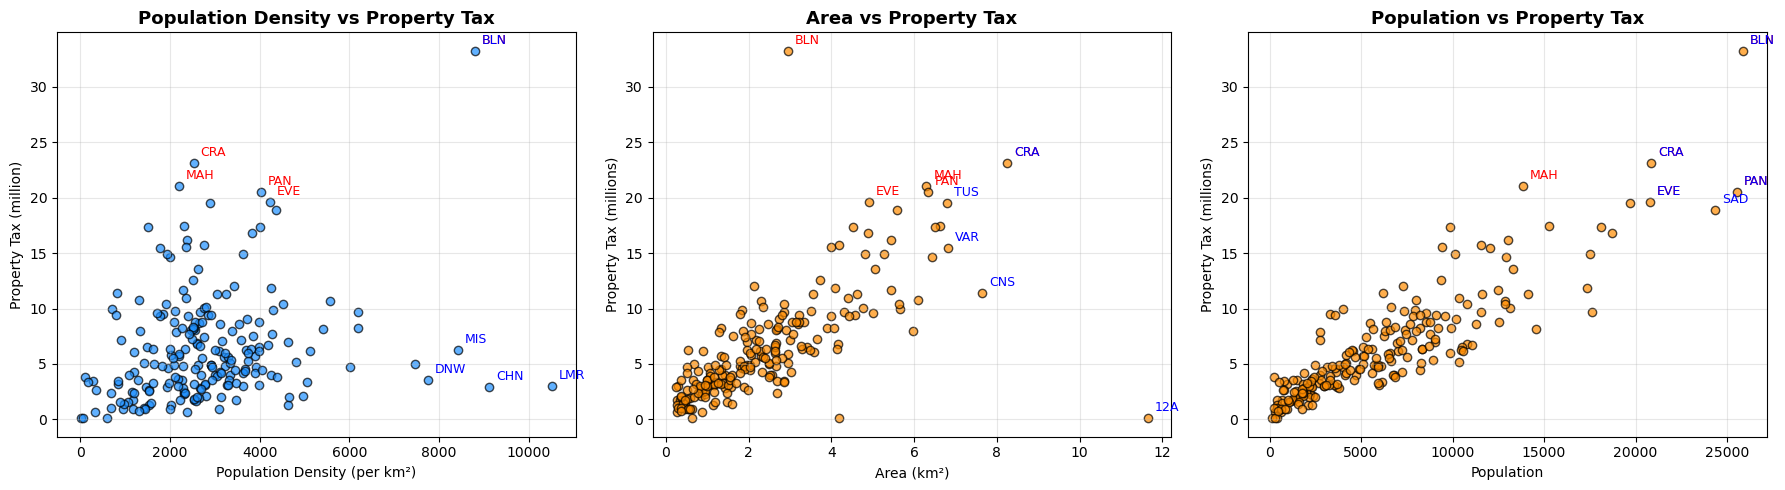

In [69]:
outliers_tax = community_tabs.nlargest(5, 'PROPERTY_TAX')
outliers_pop = community_tabs.nlargest(5, 'Population')
outliers_area = community_tabs.nlargest(5, 'Area (m^2)')
outliers_dense = community_tabs.nlargest(5, 'pop_dens (per m^2')

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot 1: Population Density vs Property Tax
ax[0].scatter(
    population_density, 
    ptax_total, 
    color='dodgerblue', alpha=0.7, edgecolors='k'
)
for i, row in outliers_tax.iterrows():
    ax[0].annotate(
        row['comm_code'],  # label using community code
        (row['pop_dens (per m^2'] * 1_000_000, row['PROPERTY_TAX']/1_000_000),
        textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='red'
    )

for i, row in outliers_dense.iterrows():
    ax[0].annotate(
        row['comm_code'],  # label using community code
        (row['pop_dens (per m^2'] * 1_000_000, row['PROPERTY_TAX']/1_000_000),
        textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='blue'
    )

ax[0].set_title("Population Density vs Property Tax", fontsize=13, weight='bold')
ax[0].set_xlabel("Population Density (per km²)")
ax[0].set_ylabel("Property Tax (million)")
ax[0].grid(alpha=0.3)

# Scatter plot 2: Area vs Property Tax
ax[1].scatter(
    commarea, 
    ptax_total,
    color='darkorange', alpha=0.7, edgecolors='k'
)
for i, row in outliers_tax.iterrows():
    ax[1].annotate(
        row['comm_code'],  # label using community code
        (row['Area (m^2)']/1_000_000, row['PROPERTY_TAX']/1_000_000),
        textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='red'
    )

for i, row in outliers_area.iterrows():
    ax[1].annotate(
        row['comm_code'],  # label using community code
        (row['Area (m^2)']/1_000_000, row['PROPERTY_TAX']/1_000_000),
        textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='blue'
    )

ax[1].set_title("Area vs Property Tax", fontsize=13, weight='bold')
ax[1].set_xlabel("Area (km²)")
ax[1].set_ylabel("Property Tax (millions)")
ax[1].grid(alpha=0.3)

# Scatter plot 3: Population vs Property Tax
ax[2].scatter(
    commpop, 
    ptax_total,
    color='darkorange', alpha=0.7, edgecolors='k'
)
for i, row in outliers_tax.iterrows():
    ax[2].annotate(
        row['comm_code'],  # label using community code
        (row['Population'], row['PROPERTY_TAX']/1_000_000),
        textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='red'
    )

for i, row in outliers_pop.iterrows():
    ax[2].annotate(
        row['comm_code'],  # label using community code
        (row['Population'], row['PROPERTY_TAX']/1_000_000),
        textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='blue'
    )

ax[2].set_title("Population vs Property Tax", fontsize=13, weight='bold')
ax[2].set_xlabel("Population")
ax[2].set_ylabel("Property Tax (millions)")
ax[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()